[0 0 1 ... 1 1 0]
[[1910   92]
 [ 108  890]]
Recall -  0.954045954045954
Precision -  0.9464816650148662
F Measure -  0.9502487562189055
Accuracy using confusion matrix -  0.9333333333333333


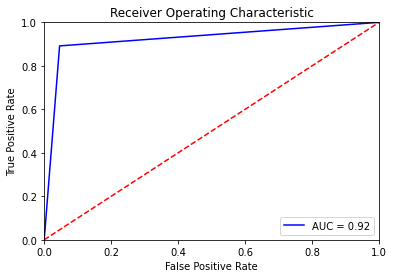

In [1]:
# Importing the libraries
import pandas as pd
import sklearn

# Importing the dataset
dataset = pd.read_csv('C:/Users/91903/Desktop/diabetes.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7,8]]
y = dataset.iloc[:, 9]
feature_cols = ['pregnancies', 'PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=200, bootstrap=True,random_state=0)
# Fit on training data
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)
print(rf_predictions)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_predictions)
tp, fn, fp, tn = confusion_matrix(y_test, rf_predictions).ravel()
print(cm)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print ("Recall - ",recall)
print ("Precision - ",precision)
fmeasure = (2*precision*recall)/(precision+recall)
print("F Measure - ",fmeasure)
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy using confusion matrix - ",accuracy_score(y_test, rf_predictions))

#ROC curve
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()